In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, concatenate, Flatten, Activation, GlobalAveragePooling2D
import numpy as np

np.random.seed(7)

# Factorized convolution block with Batch Normalization and Activation
def Conv2d_BN(x, filters, kernel_size, strides=(1, 1), padding='same', name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = conv_name = None

    x = Conv2D(filters, kernel_size, strides=strides, padding=padding, name=conv_name)(x)
    x = BatchNormalization(name=bn_name)(x)
    x = Activation('relu')(x)
    return x

# InceptionV3 block with mixed convolutional branches
def InceptionV3_Block(x, filters):
    # Branch 1: 1x1 Convolution
    branch1x1 = Conv2d_BN(x, filters[0], (1, 1))

    # Branch 2: 1x1 followed by 3x3
    branch3x3 = Conv2d_BN(x, filters[1], (1, 1))
    branch3x3 = Conv2d_BN(branch3x3, filters[1], (3, 3))

    # Branch 3: 1x1 followed by two successive 3x3 convolutions
    branch_double_3x3 = Conv2d_BN(x, filters[2], (1, 1))
    branch_double_3x3 = Conv2d_BN(branch_double_3x3, filters[2], (3, 3))
    branch_double_3x3 = Conv2d_BN(branch_double_3x3, filters[2], (3, 3))

    # Branch 4: Pooling followed by 1x1 Convolution
    branch_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2d_BN(branch_pool, filters[3], (1, 1))

    # Concatenate all branches
    x = concatenate([branch1x1, branch3x3, branch_double_3x3, branch_pool], axis=3)
    return x

# Define the InceptionV3 network
def create_inception_v3(input_shape=(256, 256, 3), num_classes=6):
    input_layer = Input(shape=input_shape)

    # Initial Convolution and Pooling Layers
    x = Conv2d_BN(input_layer, 32, (3, 3), strides=(2, 2), padding='valid')
    x = Conv2d_BN(x, 32, (3, 3), padding='valid')
    x = Conv2d_BN(x, 64, (3, 3))
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = Conv2d_BN(x, 80, (1, 1), padding='valid')
    x = Conv2d_BN(x, 192, (3, 3), padding='valid')
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # InceptionV3 Blocks
    x = InceptionV3_Block(x, [64, 64, 64, 32])
    x = InceptionV3_Block(x, [128, 128, 128, 64])
    x = InceptionV3_Block(x, [160, 160, 160, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    x = InceptionV3_Block(x, [160, 160, 160, 64])
    x = InceptionV3_Block(x, [192, 192, 192, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Final Block and Output Layer
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(1000, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)  # Output layer with 'num_classes' nodes

    model = Model(input_layer, x, name='inception_v3')

    return model

# Create the InceptionV3 model
model = create_inception_v3(input_shape=(256, 256, 3), num_classes=6)

# Model summary
model.summary()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 127, 127, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 32) 0           batch_normalization_

In [14]:
import tensorflow as tf
import time
from keras import optimizers
opt = optimizers.SGD(lr=1e-2, momentum=0.9,decay=0.0008)
#opt = Adam(lr=INIT_LR,decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  #CrossEntropyLoss  'categorical_crossentropy'
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=60, verbose=1
    
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
1123/1123 [==============================] - 256s 228ms/step - loss: 1.4603 - acc: 0.4429 - val_loss: 1.1642 - val_acc: 0.5095
Epoch 2/60
1123/1123 [==============================] - 179s 159ms/step - loss: 1.1025 - acc: 0.5909 - val_loss: 1.2777 - val_acc: 0.5385
Epoch 3/60
1123/1123 [==============================] - 171s 152ms/step - loss: 0.9096 - acc: 0.6726 - val_loss: 0.7033 - val_acc: 0.7451
Epoch 4/60
1123/1123 [==============================] - 169s 151ms/step - loss: 0.7840 - acc: 0.7129 - val_loss: 0.6762 - val_acc: 0.7511
Epoch 5/60
1123/1123 [==============================] - 170s 151ms/step - loss: 0.6706 - acc: 0.7558 - val_loss: 0.5713 - val_acc: 0.7921
Epoch 6/60
1123/1123 [==============================] - 167s 149ms/step - loss: 0.5977 - acc: 0.7836 - val_loss: 0.4233 - val_acc: 0.8592
Epoch 7/60
1123/1123 [==============================] - 168s 149ms/step - loss

Epoch 58/60
1123/1123 [==============================] - 169s 151ms/step - loss: 0.0329 - acc: 0.9894 - val_loss: 0.0118 - val_acc: 0.9957
Epoch 59/60
1123/1123 [==============================] - 170s 151ms/step - loss: 0.0343 - acc: 0.9873 - val_loss: 0.0062 - val_acc: 0.9973
Epoch 60/60
1123/1123 [==============================] - 168s 150ms/step - loss: 0.0303 - acc: 0.9901 - val_loss: 0.0085 - val_acc: 0.9970


In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

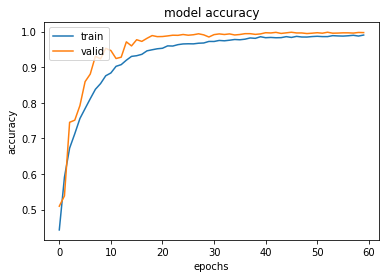

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

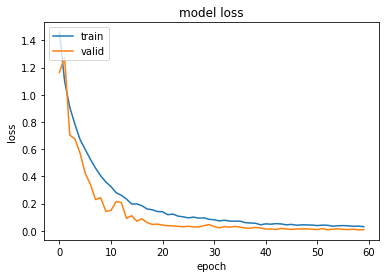

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_score, recall_score

Y_preds = model.predict(x_test)

Y_preds = np.argmax(Y_preds, axis=1)
Y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(np.round(Y_preds),Y_true)*100
cm = confusion_matrix(Y_true, np.round(Y_preds))
precision=precision_score(np.round(Y_preds),Y_true,average='weighted')*100
recall=recall_score(np.round(Y_preds),Y_true,average='weighted')*100
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
#precision = tp/(tp+fp)*100
#recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[509   0   0   0   0   0]
 [  0 699   2   0   2   0]
 [  0   1 609   0   0   0]
 [  0   1   0 386   0   0]
 [  0   2   0   1 291   0]
 [  0   0   0   0   0 494]]

============TEST METRICS=============
Accuracy: 99.69969969969969%
Precision: 99.69998547672242%
Recall: 99.69969969969969%
F1-score: 99.69984258800628

TRAIN METRIC ----------------------
Train acc: 99.01


In [20]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [ 'Commom rust','Bipolaris maydis','Curvularia lunata(wakker) boed spot','Northern leaf blight','Own spot','Sheath blight']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                                     precision    recall  f1-score   support

                        Commom rust       1.00      1.00      1.00       509
                   Bipolaris maydis       0.99      0.99      0.99       703
Curvularia lunata(wakker) boed spot       1.00      1.00      1.00       610
               Northern leaf blight       1.00      1.00      1.00       387
                           Own spot       0.99      0.99      0.99       294
                      Sheath blight       1.00      1.00      1.00       494

                        avg / total       1.00      1.00      1.00      2997



In [21]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2997/2997 [==============================] - 15s 5ms/step
Test Accuracy: 99.69969969969969


In [22]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

2997/2997 [==============================] - 15s 5ms/step
0.008508003946166938
0.996996996996997


In [23]:
print(history.history['val_acc'])

[0.5095095095492858, 0.5385385385484825, 0.7450784117649665, 0.7510844177908607, 0.7921254588120136, 0.8591925258790807, 0.8805472138805472, 0.9305972639504854, 0.9232565899232565, 0.9529529529529529, 0.9466132799466133, 0.9242575909441457, 0.9279279279279279, 0.970970970970971, 0.9596262929596263, 0.9769769769769769, 0.9723056389723056, 0.980980980980981, 0.9886553219886554, 0.9856523189856523, 0.985985985985986, 0.9876543209876543, 0.9896563229896563, 0.9893226559893227, 0.9916583249916583, 0.9896563229896563, 0.990990990990991, 0.9936603269936604, 0.9906573239906573, 0.9846513179846513, 0.9913246579913246, 0.9933266599933267, 0.9916583249916583, 0.9933266599933267, 0.9903236569903237, 0.9916583249916583, 0.993993993993994, 0.993993993993994, 0.991991991991992, 0.9933266599933267, 0.9966633299966633, 0.995995995995996, 0.9976643309976644, 0.9946613279946613, 0.9963296629963296, 0.997997997997998, 0.995995995995996, 0.995995995995996, 0.9943276609943277, 0.9953286619953287, 0.99666332

In [24]:
print(history.history['val_loss'])

[1.164167520221886, 1.2777325838933518, 0.7033062871989306, 0.6762089571198663, 0.5712795412496682, 0.4232862954253867, 0.3421267857666329, 0.22959984708198278, 0.24264403643421542, 0.14271693951725303, 0.1496786099504636, 0.21478441735673018, 0.20800644498036272, 0.09111343714208764, 0.11112604285041874, 0.07063350916542126, 0.08830270056793336, 0.06007958614476545, 0.04643951678536099, 0.04896145693941957, 0.041784142380894784, 0.03657069617897831, 0.03578742794474854, 0.032873623563680725, 0.028942066304717233, 0.03346194044593745, 0.028299323924769988, 0.02799834176340359, 0.037584863024825756, 0.04548418090552042, 0.030555917414738544, 0.021650613161535985, 0.030643059648898328, 0.026610653481147807, 0.03201653105468693, 0.02641671814394942, 0.02059149039188358, 0.01905201873255378, 0.024439785443455635, 0.02118916546964047, 0.01271432958570421, 0.013281359993344595, 0.009147265645659377, 0.017495499836530766, 0.013045485413708188, 0.009823536303125213, 0.013471041618294205, 0.013

In [25]:
print(history.history['acc'])

[0.4428984861976848, 0.590959697172122, 0.6725673569228224, 0.7128701848273447, 0.755733689588153, 0.7835671342685371, 0.8111779113783122, 0.8377866844667993, 0.8538187485950558, 0.87575150299274, 0.8836562012781998, 0.9022489423158306, 0.9070362947985738, 0.91950567800944, 0.9301937207616111, 0.9320863950122468, 0.9359830772656424, 0.9457804497884659, 0.9487864617992419, 0.9515698062792252, 0.9530171453886429, 0.9596971721220218, 0.959251836994076, 0.9631485192607437, 0.9651525272635038, 0.9655978623781776, 0.9653751948341127, 0.9671565352928079, 0.9678245379648185, 0.972166555332888, 0.9720552215542195, 0.9749498997995992, 0.9739478957783111, 0.9756179024716098, 0.9776219104876419, 0.9768425740369628, 0.9785125807169895, 0.9819639278557114, 0.980850590069027, 0.9854152749944333, 0.9826319305277221, 0.9834112669651293, 0.9825205967490537, 0.982854598085059, 0.9856379425517702, 0.9834112669784012, 0.9864172790024494, 0.9846359385304821, 0.9845246047650857, 0.9858606101091071, 0.9866399

In [26]:
print(history.history['loss'])

[1.460335015560619, 1.1024341589622524, 0.9096896520132903, 0.7839306949029599, 0.6706377029671113, 0.5976976182347442, 0.5261388265726243, 0.4611577190321077, 0.4046731894200017, 0.3585940177308321, 0.32503534713065313, 0.27966790086691573, 0.2610248631646969, 0.23327489083840616, 0.19643308383300054, 0.19751666773343304, 0.18388133301776863, 0.1601709914214862, 0.15414790838347772, 0.14170173227684782, 0.13963513970523334, 0.11828410183051674, 0.12268444470611951, 0.1076465353714578, 0.1022728012315172, 0.0948505664503617, 0.10037567465590154, 0.09284470661523506, 0.09485528640020766, 0.08437611839278933, 0.08070272911362861, 0.07276065452541612, 0.07716268233783588, 0.07174336240260258, 0.07029184007050969, 0.07081722354440333, 0.060014287466929335, 0.05715452581670887, 0.0553718624607777, 0.043731660932129365, 0.050883086186698394, 0.04826560115911473, 0.052479663755392106, 0.04994428661644833, 0.044009608370546946, 0.04657914776114142, 0.04069562910750518, 0.04378044462708732, 0.0

In [27]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred, axis = 1)
y_pred

2997/2997 [==============================] - 15s 5ms/step


array([0, 5, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[509   0   0   0   0   0]
 [  0 699   2   0   2   0]
 [  0   1 609   0   0   0]
 [  0   1   0 386   0   0]
 [  0   2   0   1 291   0]
 [  0   0   0   0   0 494]]


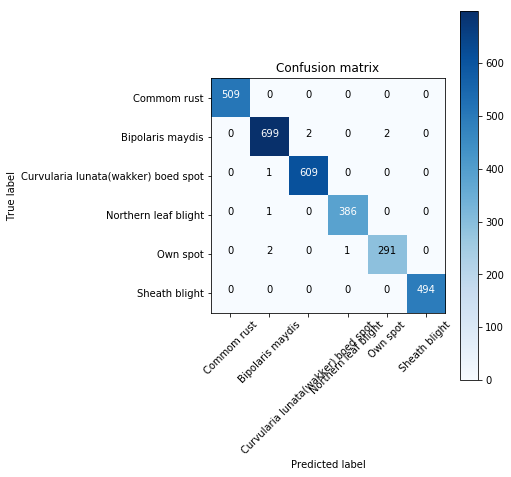

In [29]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')